In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import Functions

position_mapping = {
    'ST': 'Forward',
    'CF': 'Forward',
    'RW': 'Forward',
    'LW': 'Forward',
    'CM': 'Midfielder',
    'CDM': 'Midfielder',
    'CAM': 'Midfielder',
    'RM': 'Midfielder',
    'LM': 'Midfielder',
    'CB': 'Defender',
    'LB': 'Defender',
    'RB': 'Defender',
    'LWB': 'Defender',
    'RWB': 'Defender',
}

In [3]:
df = pd.read_csv('./FIFA18_players_database/clean_data.csv')
df.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,57,57,58,56,51,42,40,34,48,39,...,56,50,56,64,47,51,54,56,29,CM
1,57,88,67,72,81,71,55,61,66,51,...,86,74,75,40,88,79,74,74,52,CDM
2,64,80,57,61,63,61,59,52,57,44,...,61,58,70,70,82,72,75,45,54,CB
3,64,80,57,61,63,61,59,52,57,44,...,61,58,70,70,82,72,75,45,54,RB
4,50,53,41,56,35,40,25,25,41,17,...,40,39,56,52,33,62,71,21,22,CB


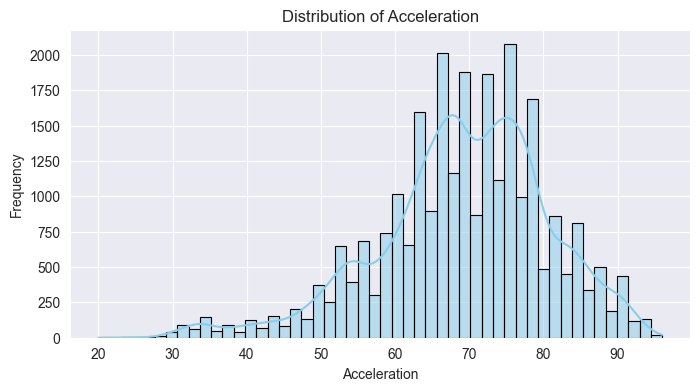

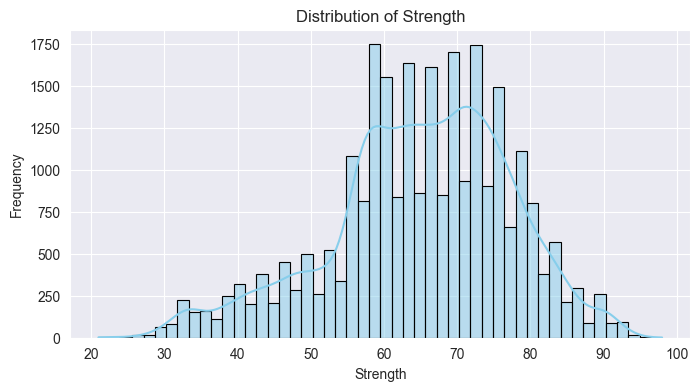

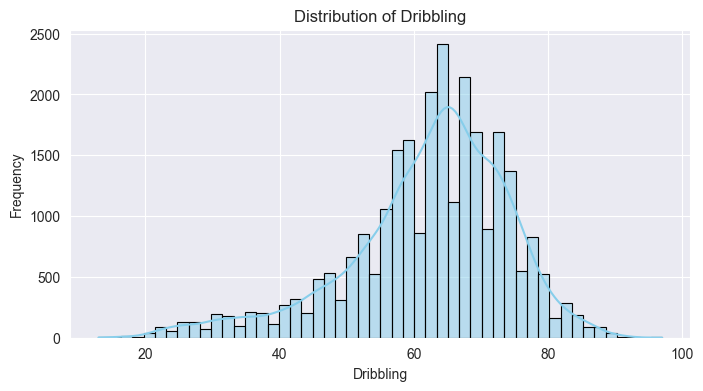

In [4]:
columns_to_plot = ['Acceleration', 'Strength', 'Dribbling']
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=50, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

All the distribution is right heavy, might not be good when we are feeding this to the Machine Learning Model.

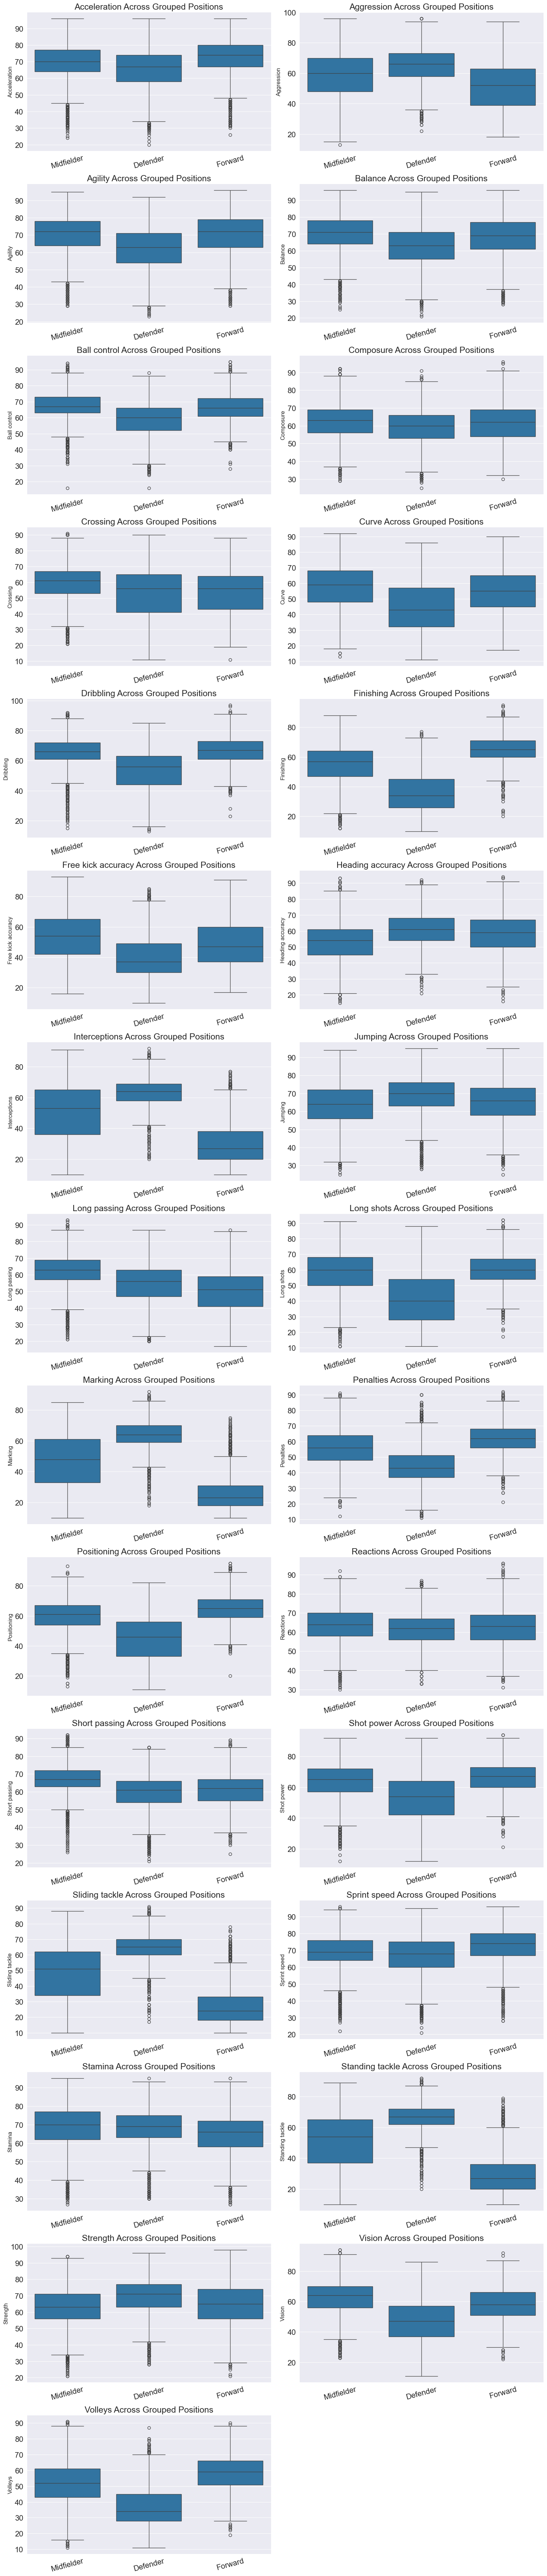

In [5]:
df['Grouped Positions'] = df['Preferred Positions'].map(position_mapping)

# Make a list of every column with a NUMERIC value 
numeric_columns = df.select_dtypes(include='number').columns

plots_per_row = 2

# Calculate rows and coloumns 
num_plots = len(numeric_columns)
num_rows = math.ceil(num_plots / plots_per_row)

# Make figure
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(16, num_rows * 5))
axes = axes.flatten()  # Make the axes to a list

# Loop to make all the plots
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x='Grouped Positions', y=column, ax=axes[i])
    axes[i].set_title(f'{column} Across Grouped Positions', fontsize=18)
    axes[i].set_xlabel('')  # Remove the label of the x axis
    axes[i].set_ylabel(column, fontsize=12)
    axes[i].tick_params(axis='x', rotation=15, labelsize=16)
    axes[i].tick_params(axis='y', labelsize=16)

# Remove useless boxplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()
plt.show()


We see that different positions has different types of strong attributes. Also the dots over and under the boxes shows that we have alot of outliers in some attributes.

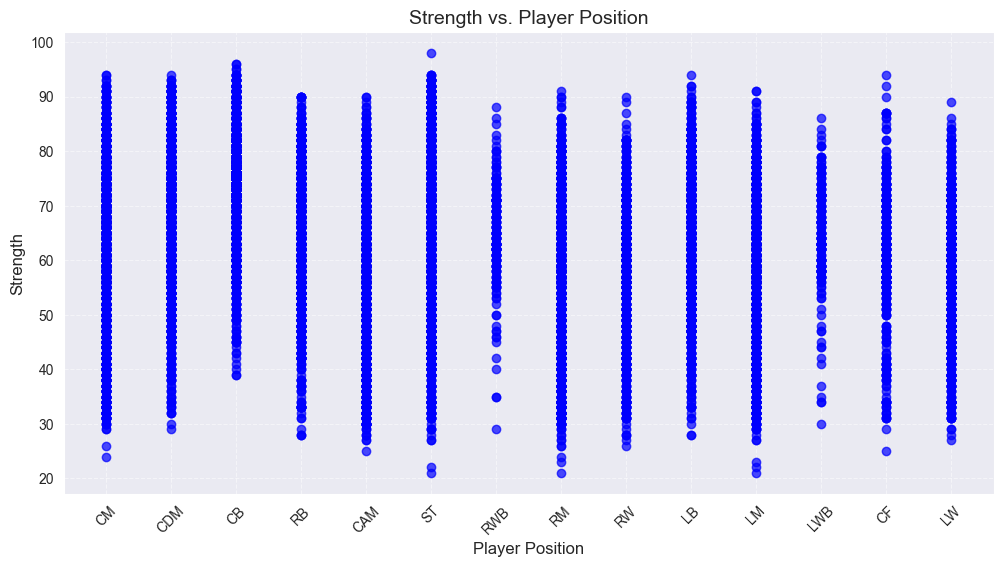

In [6]:
# Trying out scatter plotting
plt.figure(figsize=(12, 6))
positions = df['Preferred Positions'] # X
strength = df['Strength']  # Y

plt.scatter(positions, strength, alpha=0.7, color='blue')
plt.xlabel('Player Position', fontsize=12)
plt.ylabel('Strength', fontsize=12)
plt.title('Strength vs. Player Position', fontsize=14)
plt.xticks(rotation=45)  # Rotate X labels, better read ability
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

We can clearly see that Strength is a clear attribute for defensive positions.

In [3]:
df = pd.read_csv("./FIFA18_players_database/clean_data.csv")
df = Functions.remove_outliers_iqr(df)
df_normalize_outliers_removed = Functions.normalize(df, "minmax", True)
df_normalize_outliers_removed.head()

/Users/mika/Applied-Machine-Learning/INL1/Functions.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.27777778 0.40740741 0.40740741 ... 0.51851852 0.46296296 0.72222222]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, :-1] = scalar.fit_transform(df.iloc[:, :-1])
/Users/mika/Applied-Machine-Learning/INL1/Functions.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.5        0.79487179 0.79487179 ... 0.37179487 0.33333333 0.21794872]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, :-1] = scalar.fit_transform(df.iloc[:, :-1])
/Users/mika/Applied-Machine-Learning/INL1/Functions.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.33928571 0.32142857 0.32142857

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,0.277778,0.500000,0.339286,0.277778,0.162791,0.12,0.206349,0.183099,0.176471,0.350649,...,0.250,0.275862,0.575,0.354167,0.094340,0.506173,0.303571,0.431034,0.200000,CM
2,0.407407,0.794872,0.321429,0.370370,0.441860,0.50,0.507937,0.436620,0.352941,0.415584,...,0.375,0.413793,0.750,0.479167,0.754717,0.765432,0.678571,0.241379,0.533333,CB
3,0.407407,0.794872,0.321429,0.370370,0.441860,0.50,0.507937,0.436620,0.352941,0.415584,...,0.375,0.413793,0.750,0.479167,0.754717,0.765432,0.678571,0.241379,0.533333,RB
6,0.370370,0.705128,0.321429,0.462963,0.581395,0.68,0.476190,0.394366,0.568627,0.480519,...,0.525,0.793103,0.700,0.166667,0.528302,0.728395,0.857143,0.568966,0.573333,CM
7,0.370370,0.705128,0.321429,0.462963,0.581395,0.68,0.476190,0.394366,0.568627,0.480519,...,0.525,0.793103,0.700,0.166667,0.528302,0.728395,0.857143,0.568966,0.573333,CDM


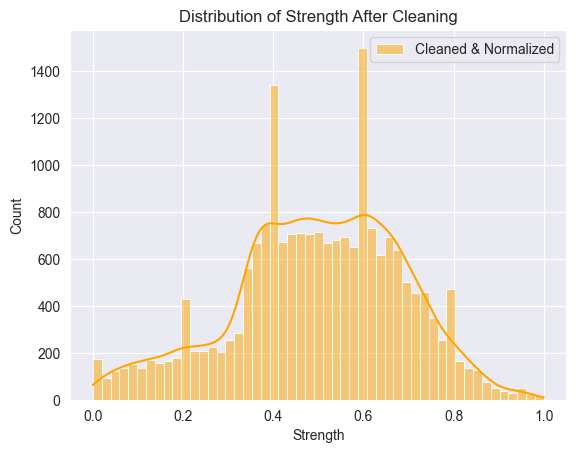

In [8]:
sns.histplot(df_Normal['Strength'], kde=True, color='orange', label='Cleaned & Normalized')
plt.legend()
plt.title('Distribution of Strength After Cleaning')
plt.show()

We see now after normalization and removing outliers that we have a more even graph

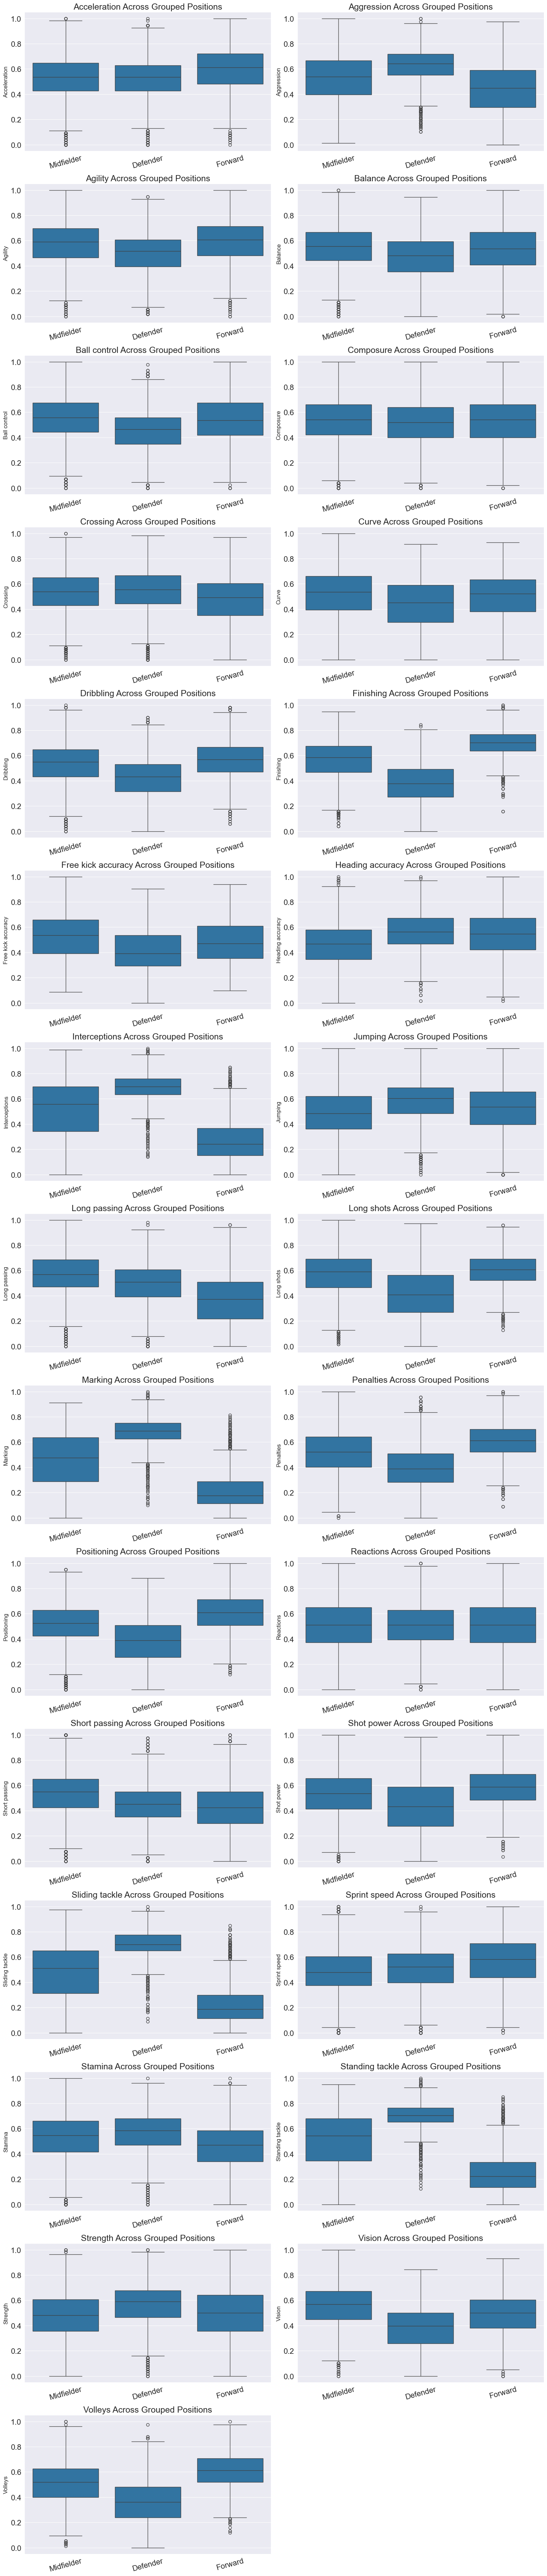

In [9]:
df_Normal['Grouped Positions'] = df_Normal['Preferred Positions'].map(position_mapping)

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(16, num_rows * 5))
axes = axes.flatten()  

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df_Normal, x='Grouped Positions', y=column, ax=axes[i])
    axes[i].set_title(f'{column} Across Grouped Positions', fontsize=18)
    axes[i].set_xlabel('')  
    axes[i].set_ylabel(column, fontsize=12)
    axes[i].tick_params(axis='x', rotation=15, labelsize=16)
    axes[i].tick_params(axis='y', labelsize=16)

if len(numeric_columns) < len(axes):
    for j in range(len(numeric_columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
